In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:/pandas Practice/Marketing.csv')
data.head(3)

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue


<h2>Line Plots<h2>

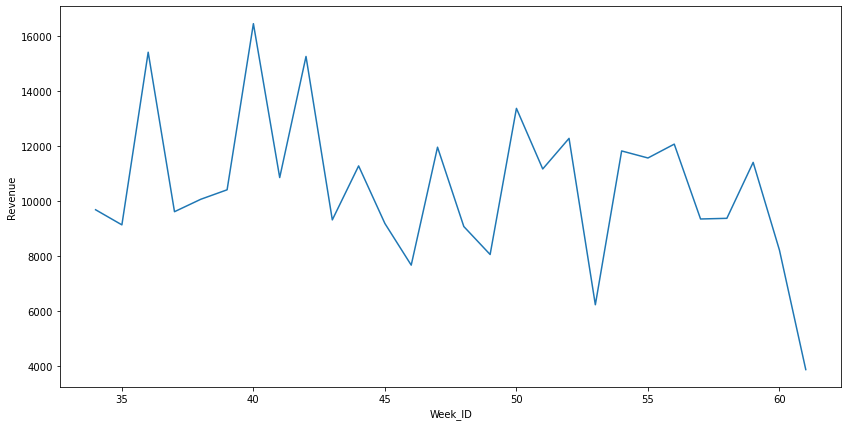

In [3]:
sns.lineplot(data=data,x='Week_ID',y='Revenue',ci=None,estimator='mean')
#By default, the estimator is 'mean', so it plots the mean revenue(y-axis) for each week value.(x-axis)
plt.gcf().set_size_inches(14,7)

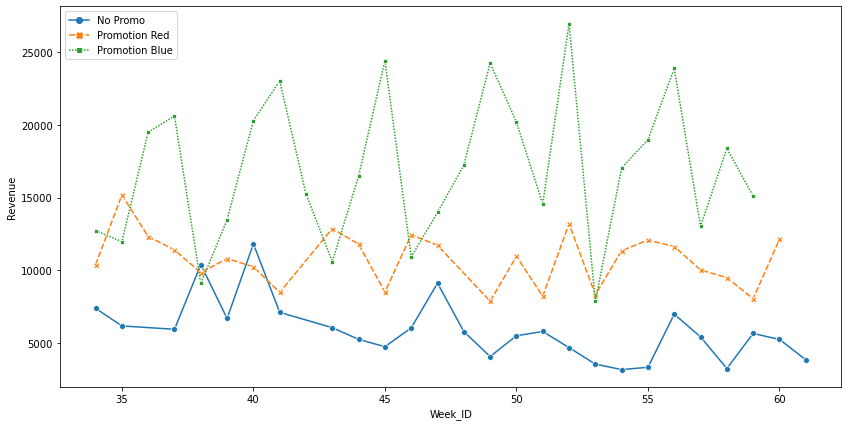

In [4]:
sns.lineplot(data=data,x='Week_ID',y='Revenue',ci=None,estimator='mean',hue='Promo',style='Promo',markers=True)
plt.gcf().set_size_inches(14,7) #The 'hue' option generates 3 lineplots for 3 levels of 'Promo' variable.
#The 'style' option generates 3 different line styles for the 3 'Promo' variable levels.
#The 'markers' option creates the 
plt.legend(loc=2)#1=Top Right, 2= Top Left, 3=Bottom Left, 4=Bottom Right

<h2>Bar Plots<h2>

,Revenue
Month_ID,
11,11255.454545
12,11667.806452
13,9588.516129
14,10683.892857
15,10555.354839
16,10806.500000
17,7636.000000


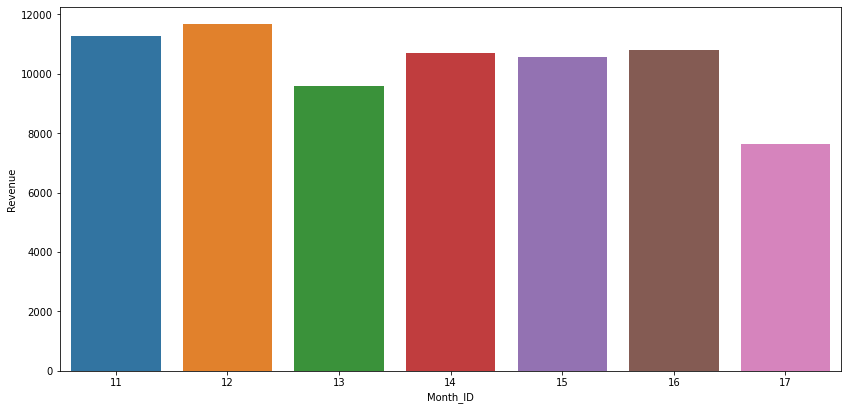

In [12]:
sns.barplot(data=data,x='Month_ID',y='Revenue',ci=None)
plt.gcf().set_size_inches(14,6.7)
#Gives us the mean revenue for each month ID.
data[['Month_ID','Revenue']].groupby('Month_ID').agg({'Revenue':'mean'})

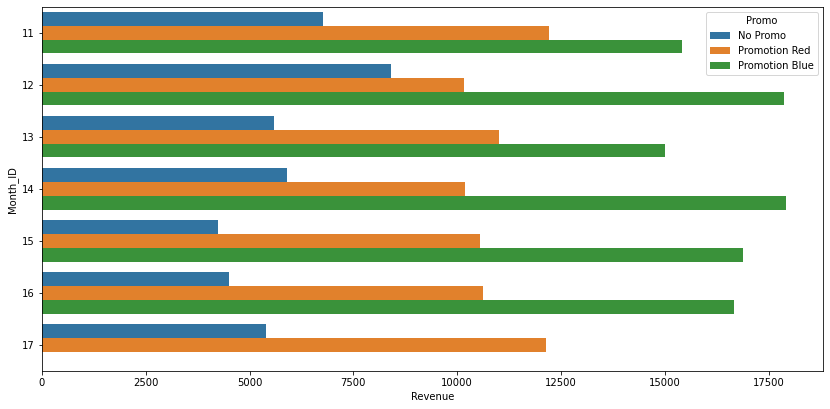

In [15]:
#Create a horizontal barplot by flipping the x and y arguments and adding 'orient' option as horizontal.
sns.barplot(data=data,y='Month_ID',x='Revenue',ci=None,hue='Promo',orient='h')
plt.gcf().set_size_inches(14,6.7)

<h2>Histograms<h2>

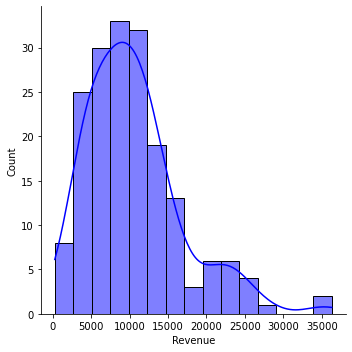

In [18]:
sns.displot(data=data,x='Revenue',kde=True,color='blue')

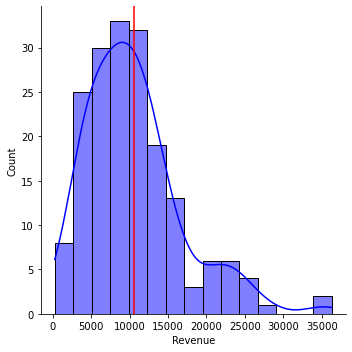

In [20]:
sns.displot(data=data,x='Revenue',kde=True,color='blue')
#Adding a vertical line representing the mean.
mean = data['Revenue'].mean()
plt.axvline(mean,0,1,color='red')

<h2>Box + Swarm Plot<h2>

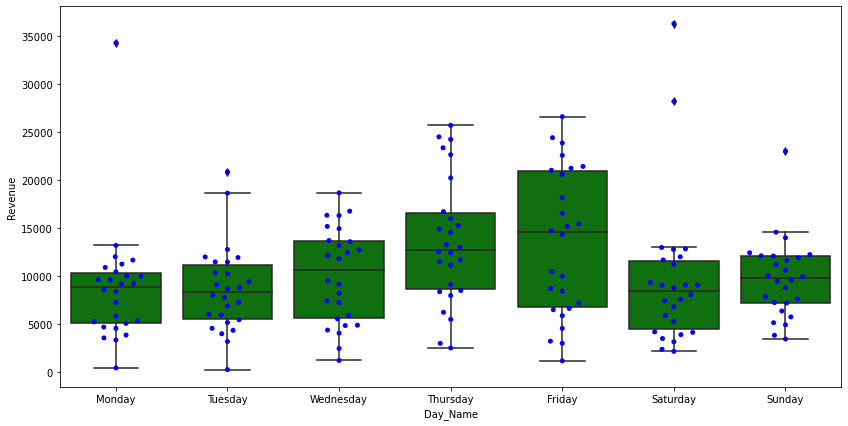

In [23]:
sns.boxplot(x='Day_Name',y='Revenue',data=data,color='green')
sns.swarmplot(x='Day_Name',y='Revenue',data=data,color='blue')
plt.gcf().set_size_inches(14,7)

<h2>Scatter Plots<h2>

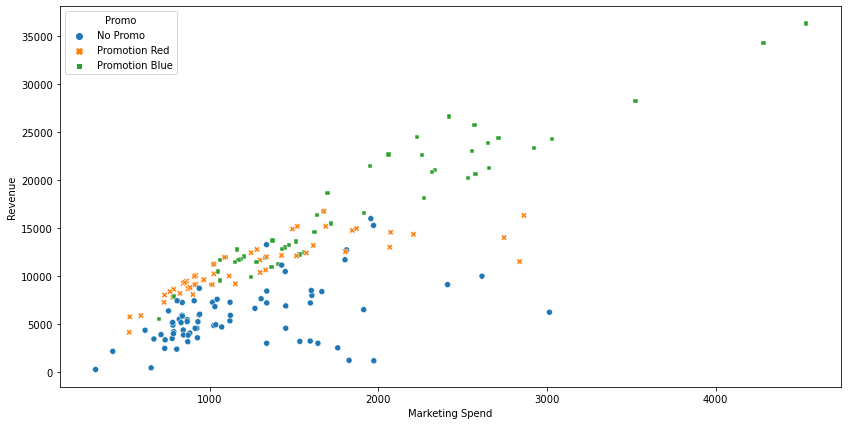

In [25]:
sns.scatterplot(data=data,x='Marketing Spend',y='Revenue',hue='Promo',style='Promo')
plt.gcf().set_size_inches(14,7)

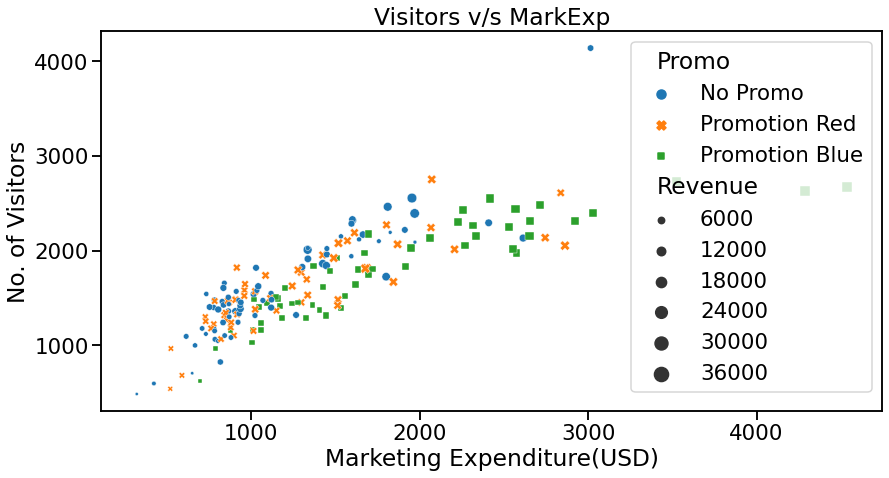

In [35]:
sns.set_context('talk',font_scale=1.3) #Alter the font style and size for the axes.
#We can save the plot as an object and then set x and y axes labels for the plot.
ax = sns.scatterplot(data=data,x='Marketing Spend',y='Visitors',hue='Promo',style='Promo',size='Revenue',sizes=(10,200))
ax.set(xlabel='Marketing Expenditure(USD)',ylabel='No. of Visitors',title='Visitors v/s MarkExp')
plt.gcf().set_size_inches(14,7)

<h2>Regression Plots<h2>

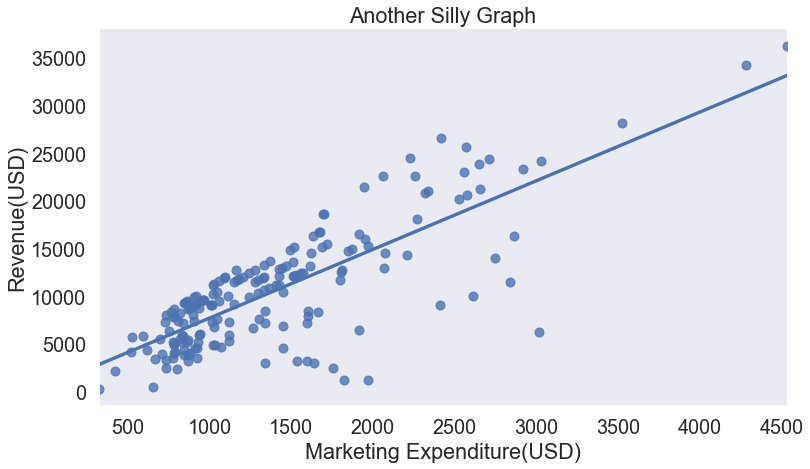

In [125]:
sns.set_context('talk',font_scale=1.2)
ax = sns.lmplot(data=data,x='Marketing Spend',y='Revenue',ci=None)
ax.set(xlabel='Marketing Expenditure(USD)',ylabel='Revenue(USD)',title='Another Silly Graph')
plt.gcf().set_size_inches(14,6.7)

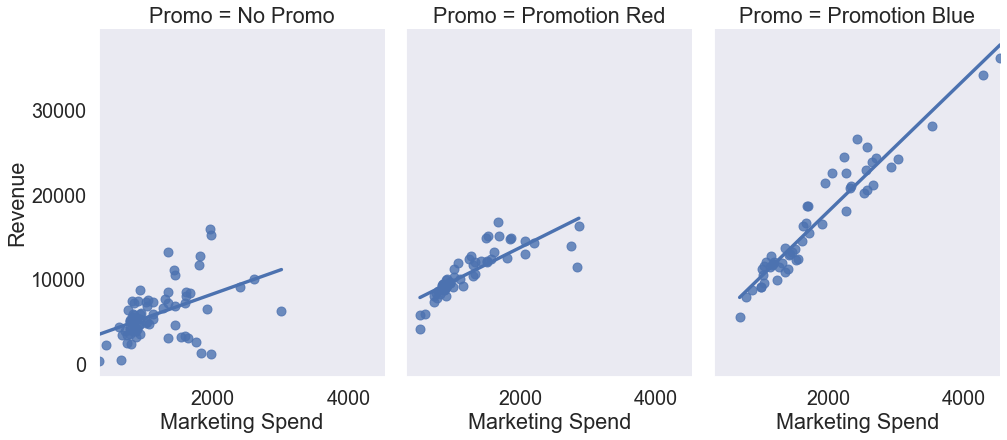

In [97]:
sns.set_context('talk',font_scale=1.2)
sns.lmplot(data=data,x='Marketing Spend',y='Revenue',col='Promo',ci=None)
plt.gcf().set_size_inches(14,6.7)

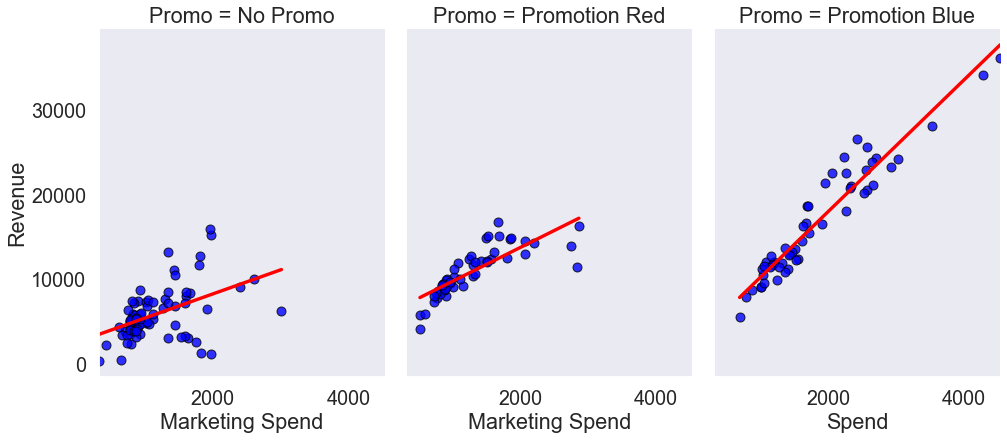

In [100]:
#Create separate colors for data points and regression line.
sns.set_context('talk',font_scale=1.2)
sns.lmplot(data=data,x='Marketing Spend',y='Revenue',col='Promo',ci=None,scatter_kws={'color':'blue','edgecolor':'black'},line_kws={'color':'red'})
plt.gcf().set_size_inches(14,6.7)

<h2>Sub Plots<h2>
<h3>Sub plots are used when we want to plot completely different plots together.<h3>
<h3>Here we first specify the matrix size which indicates the number of plots we want. Then we plot each of those one-by-one.<h3>

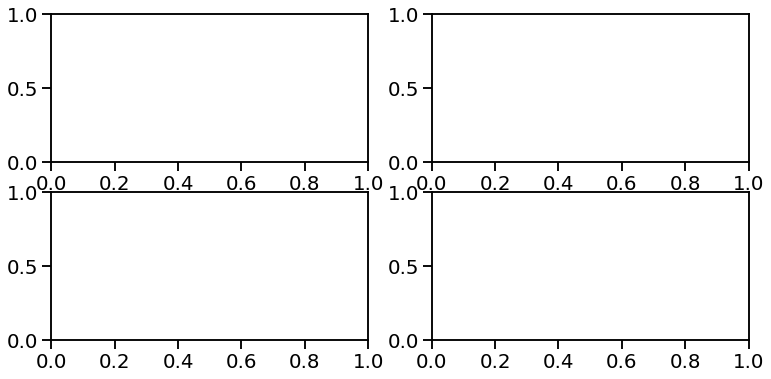

In [50]:
fig, ax = plt.subplots(2,2,figsize=(12.5,6))
#Creates 1 figure and 4 axes.

Text(0.5, 0.5, 'Plotting 2x2 Subplot grid')

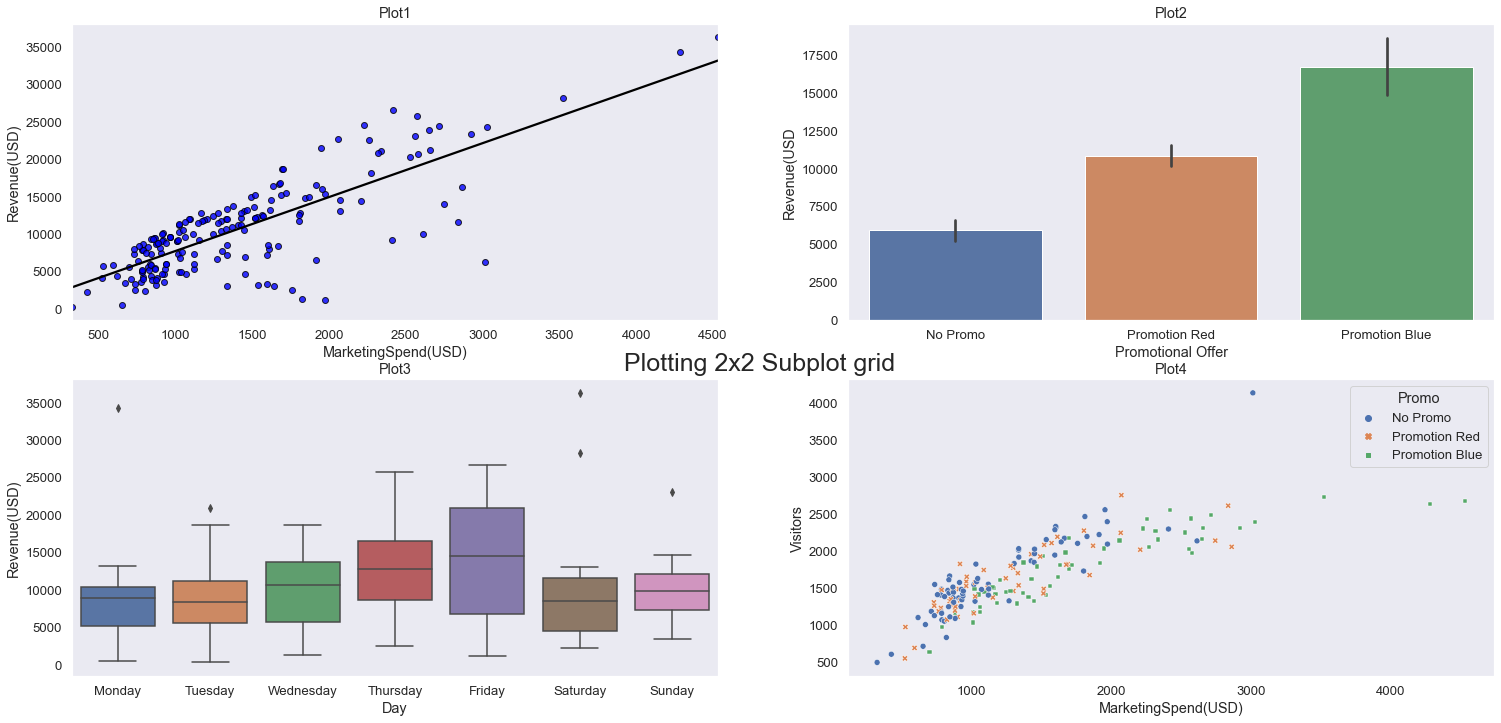

In [114]:
#Here we first specify the subplot matrix size. We gave 2,2 as 1st and 2nd arguments indicating nrows=2 and ncols=2. 3rd argument is the figure size.
#We then plot 4 different plots in our subplot matrix. Using the 'ax' option, we specify which plot goes at what place in the grid.
#Since 'lmplot' doesn't have the 'ax' option, we used 'regplot' as an alternative as it has 'ax' option and can be included in a subplot.
fig, axis = plt.subplots(2,2,figsize=(25.5,12))
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
sns.regplot(data=data,x='Marketing Spend',y='Revenue',ci=None,scatter_kws={'color':'blue','edgecolor':'black'},line_kws={'color':'black'},ax=axis[0,0])
sns.barplot(data=data,x='Promo',y='Revenue',ax=axis[0,1])
sns.boxplot(data=data,x='Day_Name',y='Revenue',ax=axis[1,0])
sns.scatterplot(data=data,x='Marketing Spend',y='Visitors',hue='Promo',style='Promo',ax=axis[1,1])
#Set the axes labels and title for each plot.
axis[0,0].set(title='Plot1',xlabel='MarketingSpend(USD)',ylabel='Revenue(USD)')
axis[0,1].set(title='Plot2',xlabel='Promotional Offer',ylabel='Revenue(USD')
axis[1,0].set(title='Plot3',xlabel='Day',ylabel='Revenue(USD)')
axis[1,1].set(title='Plot4',xlabel='MarketingSpend(USD)',ylabel='Visitors')
fig.suptitle('Plotting 2x2 Subplot grid',fontsize=25,y=0.5) #Give a main title to the subplot matrix.

<h2>Boxen Plots<h2>

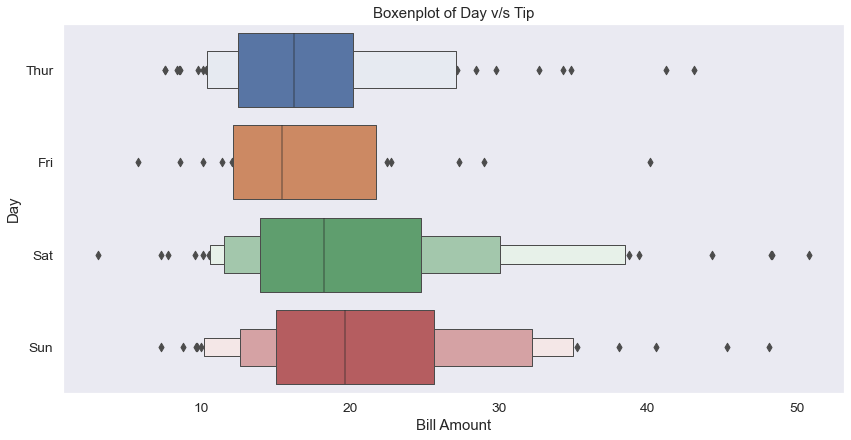

In [123]:
df_tips = sns.load_dataset('tips')
sns.set_theme(style='dark',palette='deep',font_scale=1.25)
ax = sns.boxenplot(data=df_tips,y='day',x='total_bill',orient='h') #Save as object to customize axes,labels next.
ax.set(title='Boxenplot of Day v/s Tip',xlabel='Bill Amount',ylabel='Day') 
plt.gcf().set_size_inches(14,6.8)

<h2>catplot<h2>
<h3>The 'catplot' is a general categorical plot function which includes:<h3>
<h4>1. Scatter Plots: Default being stripplot and then swarmplot.<h4>
<h4>2. Distribution Plots: Boxplot,violinplot,boxenplot.<h4>
<h4>3. Estimate Plots: Countplot,barplot.<h4>
<h3>The option 'kind' is used to specify the type of plot desired.<h3>

In [132]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


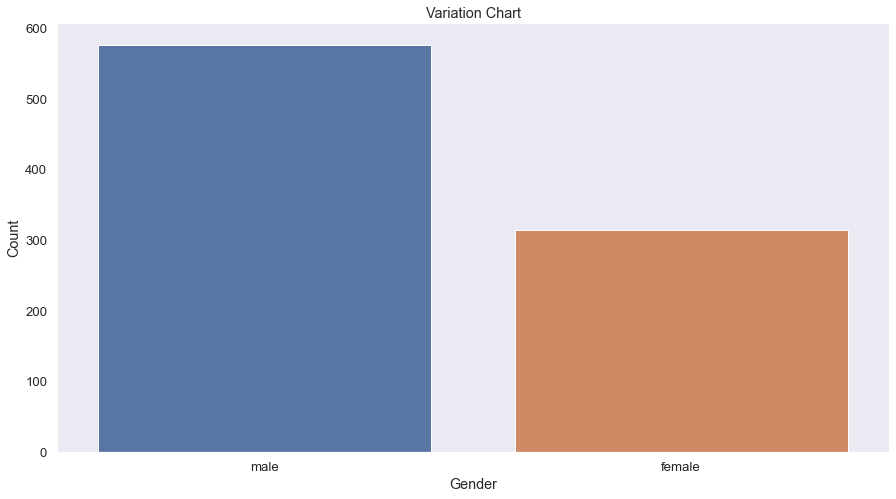

In [135]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.catplot(data=df,x='sex',kind='count')
ax.set(title='Variation Chart',xlabel='Gender',ylabel='Count')
plt.gcf().set_size_inches(14,7)

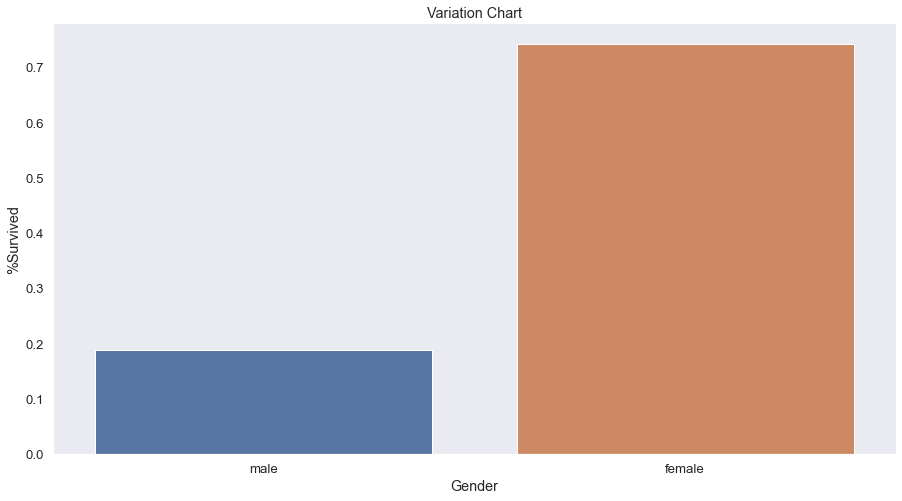

In [136]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.catplot(data=df,x='sex',y='survived',kind='bar',ci=None)
ax.set(title='Variation Chart',xlabel='Gender',ylabel='%Survived')
plt.gcf().set_size_inches(14,7)

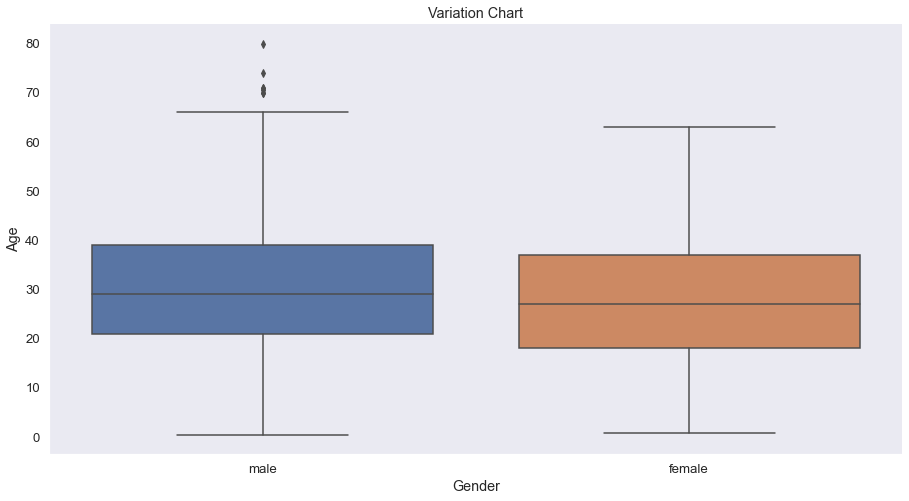

In [137]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.catplot(data=df,x='sex',y='age',kind='box')
ax.set(title='Variation Chart',xlabel='Gender',ylabel='Age')
plt.gcf().set_size_inches(14,7)

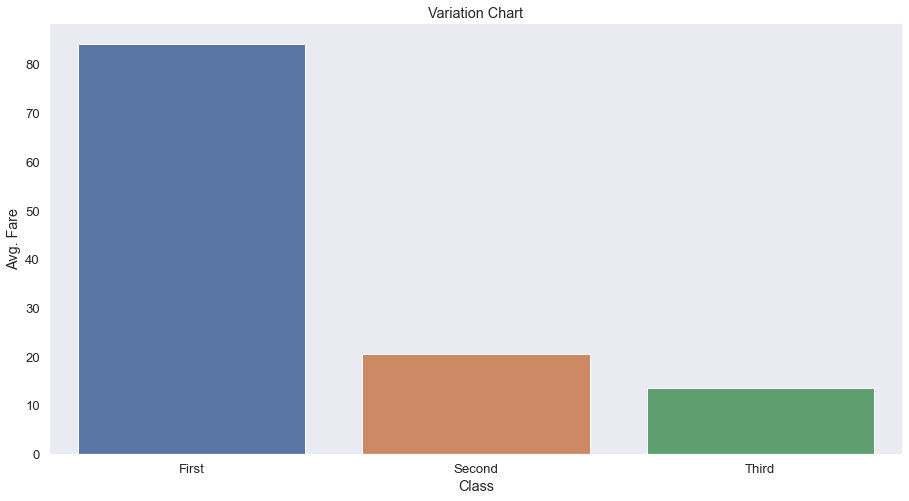

In [139]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.catplot(data=df,x='class',y='fare',kind='bar',ci=None)
ax.set(title='Variation Chart',xlabel='Class',ylabel='Avg. Fare')
plt.gcf().set_size_inches(14,7)

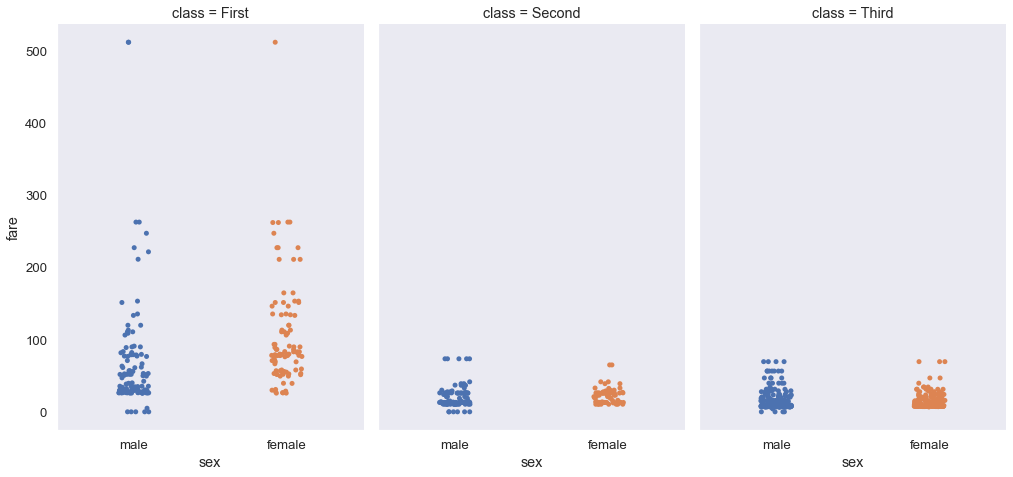

In [143]:
#When 'kind' option isn't specified, the default plot generated is a stripplot.
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
sns.catplot(data=df,x='sex',y='fare',col='class')
plt.gcf().set_size_inches(14,7)

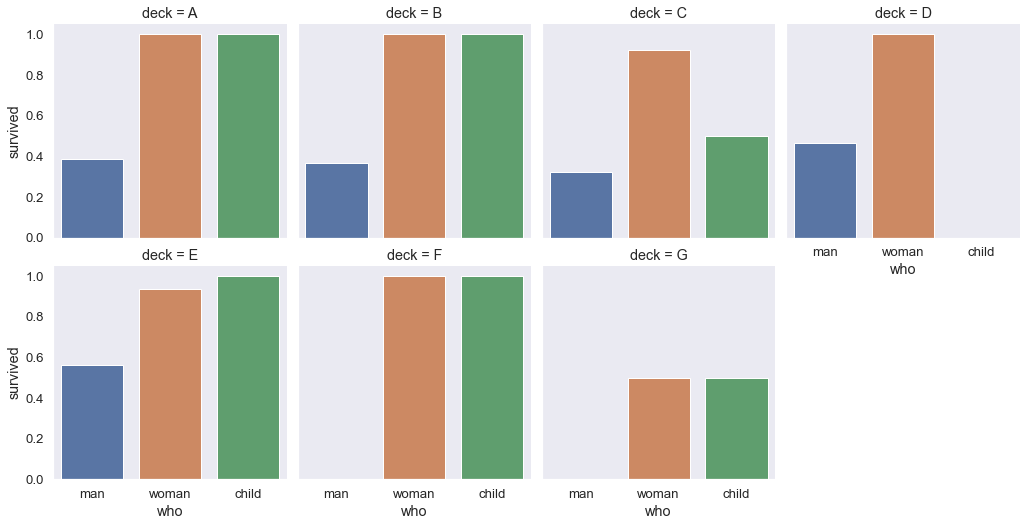

In [146]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
sns.catplot(data=df,x='who',y='survived',col='deck',col_wrap=4,kind='bar',ci=None)
plt.gcf().set_size_inches(14,7)

<h2>relplot<h2>
<h3>The relational plots are used to study the variation between 2 numeric variables.<h3>
<h3>They generate two plots- scatterplot(default) and lineplot.<h3>

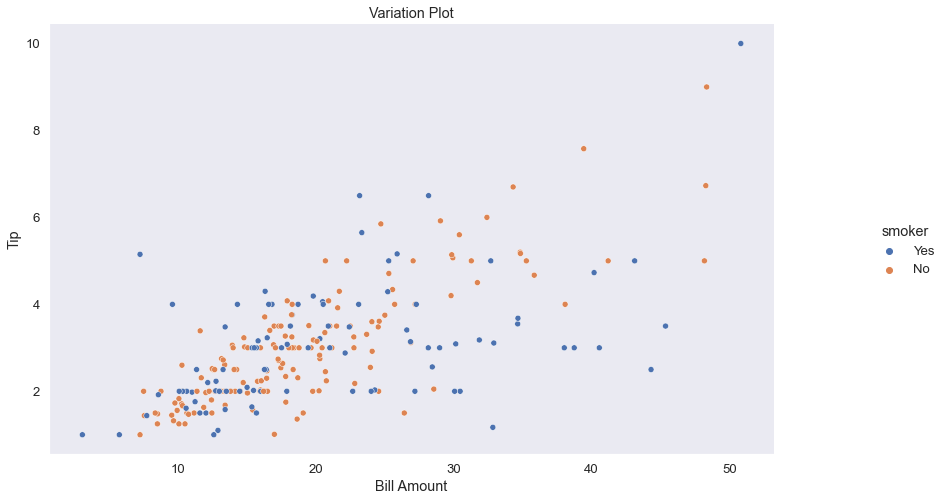

In [147]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.relplot(data=df_tips,x='total_bill',y='tip',hue='smoker')
ax.set(title='Variation Plot',xlabel='Bill Amount',ylabel='Tip')
plt.gcf().set_size_inches(14,7)

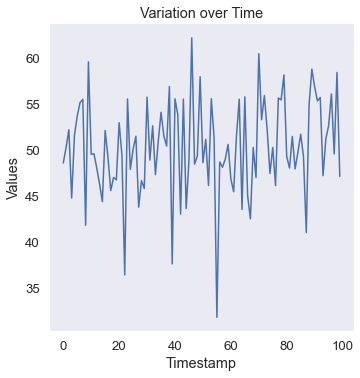

In [151]:
df1 = pd.DataFrame(dict(time=np.arange(100),value=np.random.normal(50,5,100)))
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
ax = sns.relplot(data=df1,x='time',y='value',kind='line')
ax.set(title='Variation over Time',xlabel='Timestamp',ylabel='Values')

<h2>Pair Plots<h2>

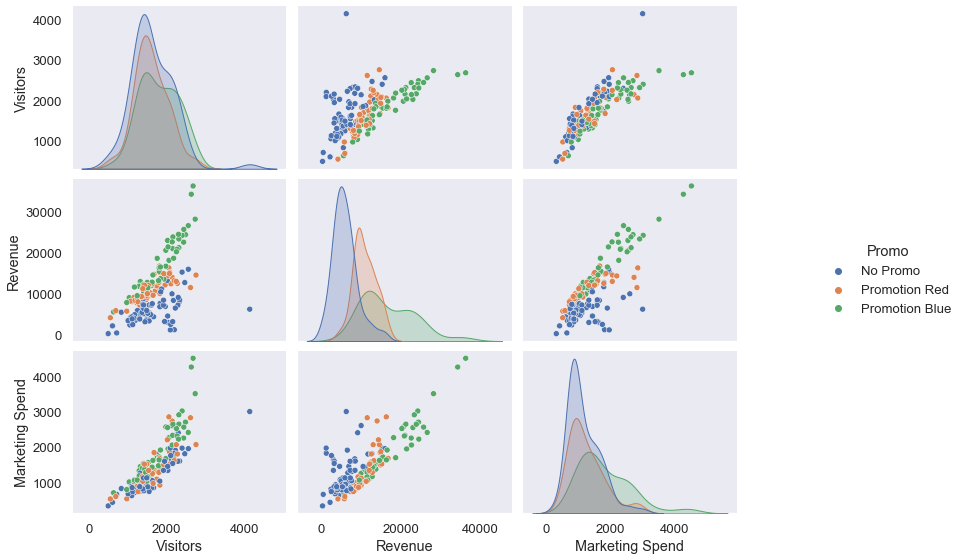

In [157]:
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
sns.pairplot(data=data[['Visitors','Revenue','Marketing Spend','Promo']],hue='Promo')
plt.gcf().set_size_inches(14,8)

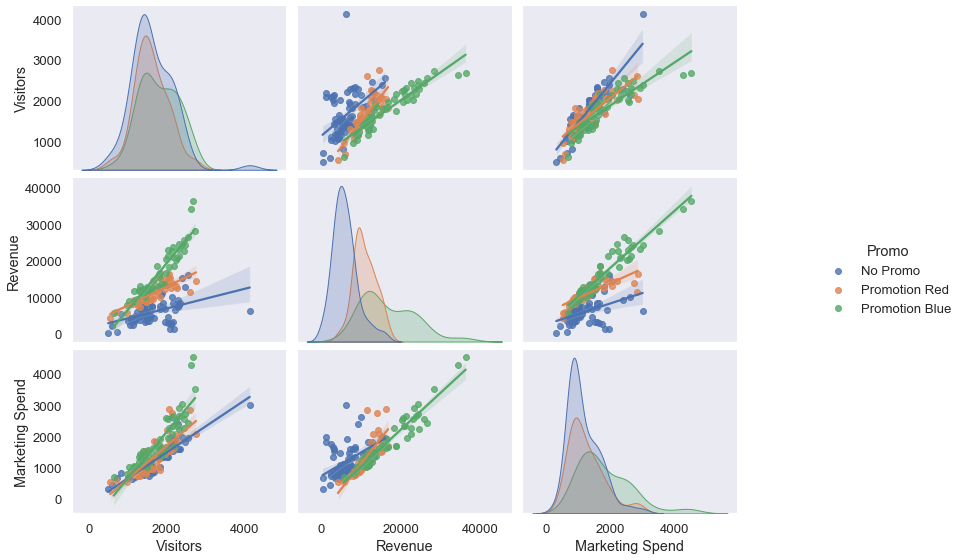

In [159]:
#Include a regression line with the scatter plots using 'kind=reg'.
sns.set_theme(style='dark',palette='deep',font_scale=1.2)
sns.pairplot(data=data[['Visitors','Revenue','Marketing Spend','Promo']],hue='Promo',kind='reg')
plt.gcf().set_size_inches(14,8)